#### Урок 7. Многомерный статистический анализ. Линейная регрессия

In [138]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

In [139]:
x1 = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y1 = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])


In [140]:
b1 = (np.mean(x1 * y1) - np.mean(x1) * np.mean(y1)) / (np.mean(x1 ** 2) - np.mean(x1) ** 2)
b0 = np.mean(y1) - b1 * np.mean(x1)
print("Коэффициенты линейной регрессии",b1, b0)
print(f"Модель линейной регрессии имеет вид: 𝑦={b0.round(2)}+{b1.round(2)}*𝑥")

Коэффициенты линейной регрессии 2.620538882402765 444.1773573243596
Модель линейной регрессии имеет вид: 𝑦=444.18+2.62*𝑥


Text(0, 0.5, 'Скоринг')

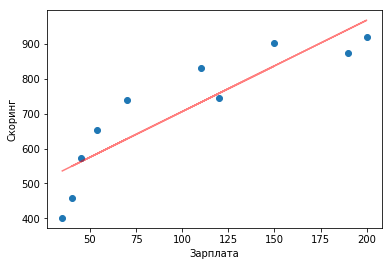

In [141]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('Зарплата')
plt.ylabel('Скоринг')

In [142]:
z1 = b0 + b1 * x1
R1 = z1.var() / y1.var()
R1

0.7876386635293678

In [143]:
np.corrcoef(x1, y1) ** 2

array([[1.        , 0.78763866],
       [0.78763866, 1.        ]])

In [144]:
a = {
    "salary": [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
    "scoring": [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
}
x3 = pd.DataFrame(a)


In [145]:
a = {
    "salary": [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
}
x2 = pd.DataFrame(a)

print(x2)

   salary
0      35
1      45
2     190
3     200
4      40
5      70
6      54
7     150
8     120
9     110


In [146]:

ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))
x2.shape
print(x2)

[[  1.  35.]
 [  1.  45.]
 [  1. 190.]
 [  1. 200.]
 [  1.  40.]
 [  1.  70.]
 [  1.  54.]
 [  1. 150.]
 [  1. 120.]
 [  1. 110.]]


In [147]:

XTX = x2.T.dot(x2)
print(np.linalg.det(XTX))
print(XTX)

349464.00000000023
[[1.00000e+01 1.01400e+03]
 [1.01400e+03 1.37766e+05]]


In [148]:

y2

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [149]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x2.T).dot(y2)

print("Коэффициенты линейной регрессии методом наименьших квадратов",b)

Коэффициенты линейной регрессии методом наименьших квадратов [[444.17735732]
 [  2.62053888]]


In [150]:
z1 = b0 + b1 * x1

print(f'real: {y1[:5]}')
print(f'pred: {z1[:5]}')
R1 = z1.var() / y1.var()
print("Коэффициент детерминации:" , R1)

real: [401 574 874 919 459]
pred: [535.89621821 562.10160703 942.07974498 968.2851338  548.99891262]
Коэффициент детерминации: 0.7876386635293678


In [151]:
def mean_approximation_error(y_real: np.ndarray, y_pred: np.ndarray) -> float:
    """Средняя ошибка аппроксимации.
    """
    
    return np.abs((y_real - y_pred) / y_real).mean()

print("Средняя ошибка аппроксимации:" , mean_approximation_error(y1, z1))

Средняя ошибка аппроксимации: 0.11469251843561709


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a16ffd630>,
      dtype=object)

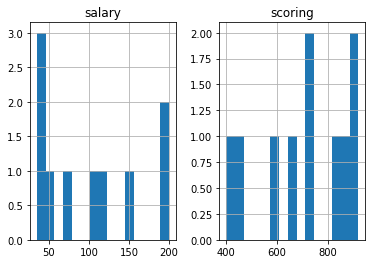

In [153]:
x3.hist(bins=15)

In [154]:
# Оцените построенное уравнение регрессии с помощью F-критерия Фишера.

k1 = 1
k2 = 10-1-1

T1 = (R1 / (1 - R1)) * (k2 / k1)
T1

29.67164085966437

In [155]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

In [156]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

s_slope = standard_error_slope(x1, y1, z1)
s_slope

0.48108279568516005

In [157]:
alpha = 0.05

t = stats.t.ppf(1 - alpha / 2, df=8)
t

2.3060041350333704

In [158]:
T = b1 / s_slope
T

5.447168150485579

In [159]:
(b1 - t * s_slope, b1 + t * s_slope)

(1.5111599662593718, 3.729917798546158)

In [160]:
# Оцените значимость получившихся параметров уравнения
# регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

s_intercept = standard_error_intercept(x1, y1, z1)
s_intercept

56.46649755068153

In [161]:
T = b0 / s_intercept
T

7.866210524668863

In [162]:
(b0 - t * s_intercept, b0 + t * s_intercept)

(313.9653804816363, 574.3893341670829)

Задача 2

Посчитать коэффициенты линейной регрессии для т.н. Квартета Энскомба (см. урок 6).

In [163]:
anscombe_dataset = pd.read_csv('anscombe_dataset.csv', index_col='id')

anscombe_dataset

,x1,y1,x2,y2,x3,y3,x4,y4
id,,,,,,,,
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


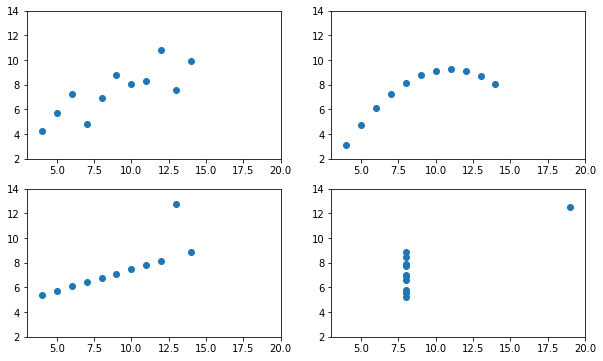

In [164]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10, 6)

ax1, ax2, ax3, ax4 = axes.flatten()

for i, ax in enumerate(axes.flatten()):
    x_key = f'x{i + 1}'
    y_key = f'y{i + 1}'
    
    ax.scatter(anscombe_dataset[x_key], anscombe_dataset[y_key])
    
    ax.set_xlim(3, 20)
    ax.set_ylim(2, 14)

In [165]:
x1 = anscombe_dataset[['x1']].values
y1 = anscombe_dataset[['y1']].values

In [166]:

def linear_rerg(x1,y1):
    """Коэффициенты линейной регрессии
    """ 
    b1 = (np.mean(x1 * y1) - np.mean(x1) * np.mean(y1)) / (np.mean(x1 ** 2) - np.mean(x1) ** 2)

    b0 = np.mean(y1) - b1 * np.mean(x1)
    return( b0 , b1 )

In [167]:
linear_rerg(x1,y1)

(3.0000909090909245, 0.5000909090909076)

In [168]:
x1 = anscombe_dataset[['x2']].values
y1 = anscombe_dataset[['y2']].values
linear_rerg(x1,y1)


(3.0009090909090768, 0.5000000000000014)

In [169]:
x1 = anscombe_dataset[['x3']].values
y1 = anscombe_dataset[['y3']].values
linear_rerg(x1,y1)

(3.0024545454545555, 0.4997272727272716)

In [131]:
x1 = anscombe_dataset[['x4']].values
y1 = anscombe_dataset[['y4']].values
linear_rerg(x1,y1)

(3.0017272727272726, 0.49990909090909097)

Коэффициенты линейной регрессии одинаковы для всех пар признак-переменная